In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
sns.set_style('darkgrid')

In [78]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [79]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [80]:
df_cases.tail(10)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
27,221,93,104,3,119,172,128,682,65,320,356,2,30,307,2602
28,240,100,122,3,147,189,173,779,72,377,408,2,36,353,3001
29,254,110,127,3,173,208,177,851,85,427,476,4,40,410,3345
30,267,130,141,4,200,226,194,931,99,478,534,4,41,457,3706
31,288,139,144,4,227,231,209,984,102,512,577,4,41,499,3961
32,296,149,152,4,239,243,210,1094,112,547,621,4,42,516,4229
33,312,160,155,4,255,259,223,1166,122,575,700,4,43,586,4564
34,362,167,163,5,288,280,236,1251,137,607,747,4,43,667,4957
35,364,177,164,6,333,302,251,1314,144,662,799,4,43,712,5275
36,376,189,179,6,356,324,261,1387,148,707,856,5,43,753,5590


In [81]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
27,18128,2602,126
28,19535,3001,172
29,20798,3345,218
30,23143,3706,220
31,24036,3961,222
32,25022,4229,296
33,26226,4565,366
34,27518,4957,447
35,28652,5275,495
36,29903,5590,542


## National Statistics

### total number of cases over time

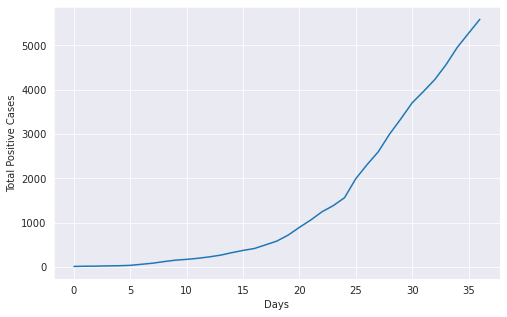

In [82]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

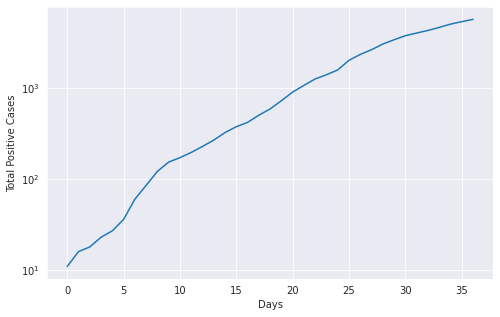

In [83]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

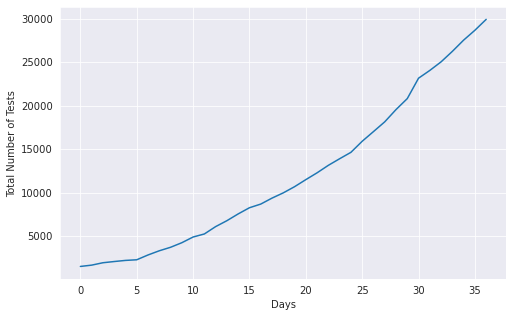

In [84]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [85]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

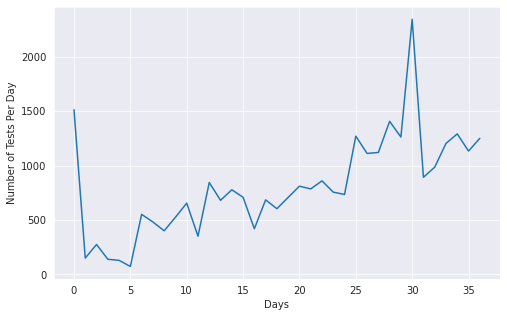

In [86]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

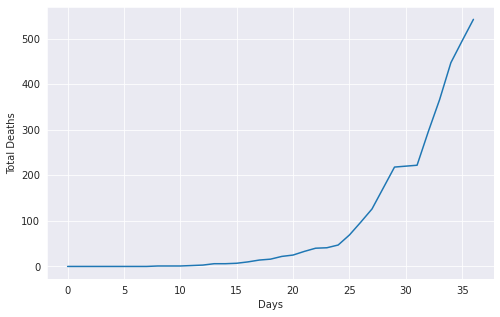

In [87]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

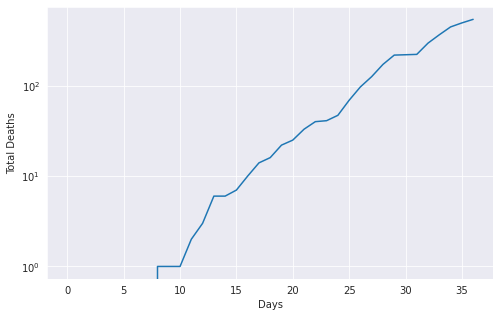

In [88]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

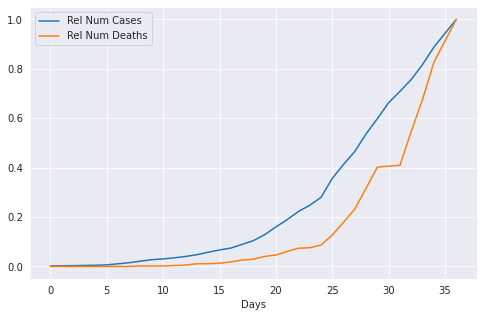

In [89]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

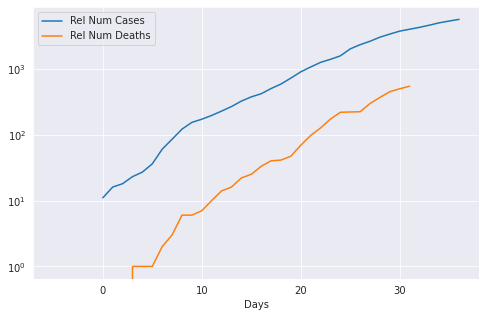

In [90]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

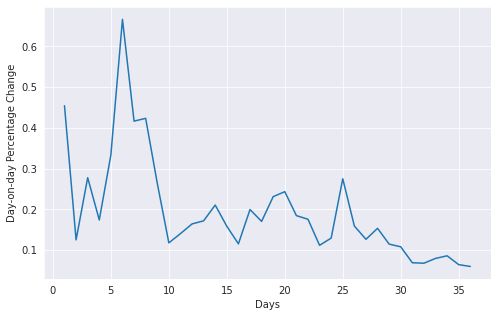

In [91]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

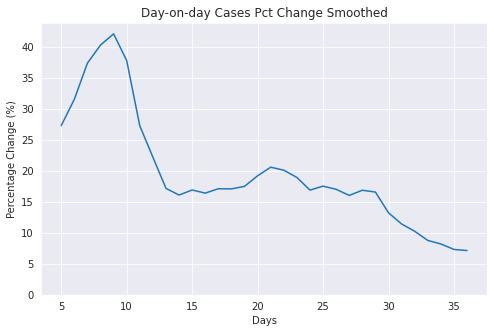

In [92]:
df_total['Total Positive Cases'].pct_change().rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [93]:
df_total['Total Positive Cases'].pct_change()[-7:]

30    0.107922
31    0.068807
32    0.067660
33    0.079451
34    0.085871
35    0.064152
36    0.059716
Name: Total Positive Cases, dtype: float64

In [94]:
df_total['Total Positive Cases'].pct_change().describe()

count    36.000000
mean      0.195048
std       0.129039
min       0.059716
25%       0.115118
50%       0.161580
75%       0.234222
max       0.666667
Name: Total Positive Cases, dtype: float64

In [95]:
df_cases.pct_change().rolling(7).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
27,0.174805,0.225289,0.153790,NaN,0.171644,0.128927,0.229717,0.150771,0.122880,0.160246,0.183442,NaN,0.033365,0.256328,0.165966
28,0.185157,0.204985,0.149211,NaN,0.201686,0.131618,0.215424,0.148388,0.118560,0.153111,0.168273,NaN,0.061937,0.219463,0.161505
29,0.164918,0.183557,0.115552,NaN,0.192110,0.121288,0.196505,0.124802,0.131367,0.146547,0.179750,NaN,0.059953,0.242531,0.152790
30,0.143659,0.148306,0.124157,NaN,0.194798,0.135154,0.182754,0.128733,0.131087,0.147159,0.162152,NaN,0.063524,0.258907,0.152258
31,0.094048,0.121054,0.102253,NaN,0.184527,0.124637,0.184583,0.119766,0.128613,0.147227,0.158458,NaN,0.063524,0.270701,0.143611
32,0.076680,0.099585,0.075441,NaN,0.179834,0.093223,0.141976,0.104555,0.119892,0.122910,0.127456,NaN,0.056426,0.135356,0.113975
33,0.066646,0.091579,0.065838,0.047619,0.151804,0.086272,0.114275,0.091758,0.113039,0.106804,0.123325,0.142857,0.054902,0.128034,0.102569
34,0.073747,0.087977,0.067497,0.083333,0.136065,0.072414,0.096148,0.090870,0.113362,0.096645,0.112246,0.142857,0.054902,0.117971,0.096812
35,0.062254,0.085778,0.043648,0.111905,0.124773,0.069519,0.055004,0.077746,0.105276,0.084143,0.101324,0.142857,0.026330,0.106204,0.084070
36,0.058630,0.081178,0.050860,0.111905,0.109373,0.065565,0.057393,0.072479,0.083451,0.074908,0.087705,0.035714,0.010457,0.091363,0.076226


### What is the day-on-day percentage rise in deaths?

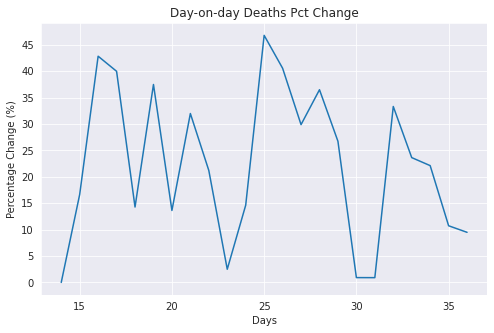

In [96]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

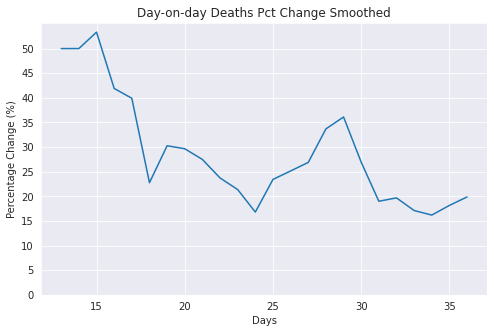

In [97]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [98]:
death_pct_change[-10:]

27    0.298969
28    0.365079
29    0.267442
30    0.009174
31    0.009091
32    0.333333
33    0.236486
34    0.221311
35    0.107383
36    0.094949
Name: Total Deaths, dtype: float64

In [99]:
death_pct_change.describe()

count    29.000000
mean           inf
std            NaN
min       0.000000
25%       0.107383
50%       0.236486
75%       0.400000
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

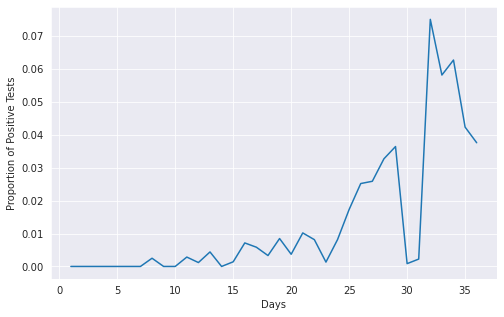

In [100]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

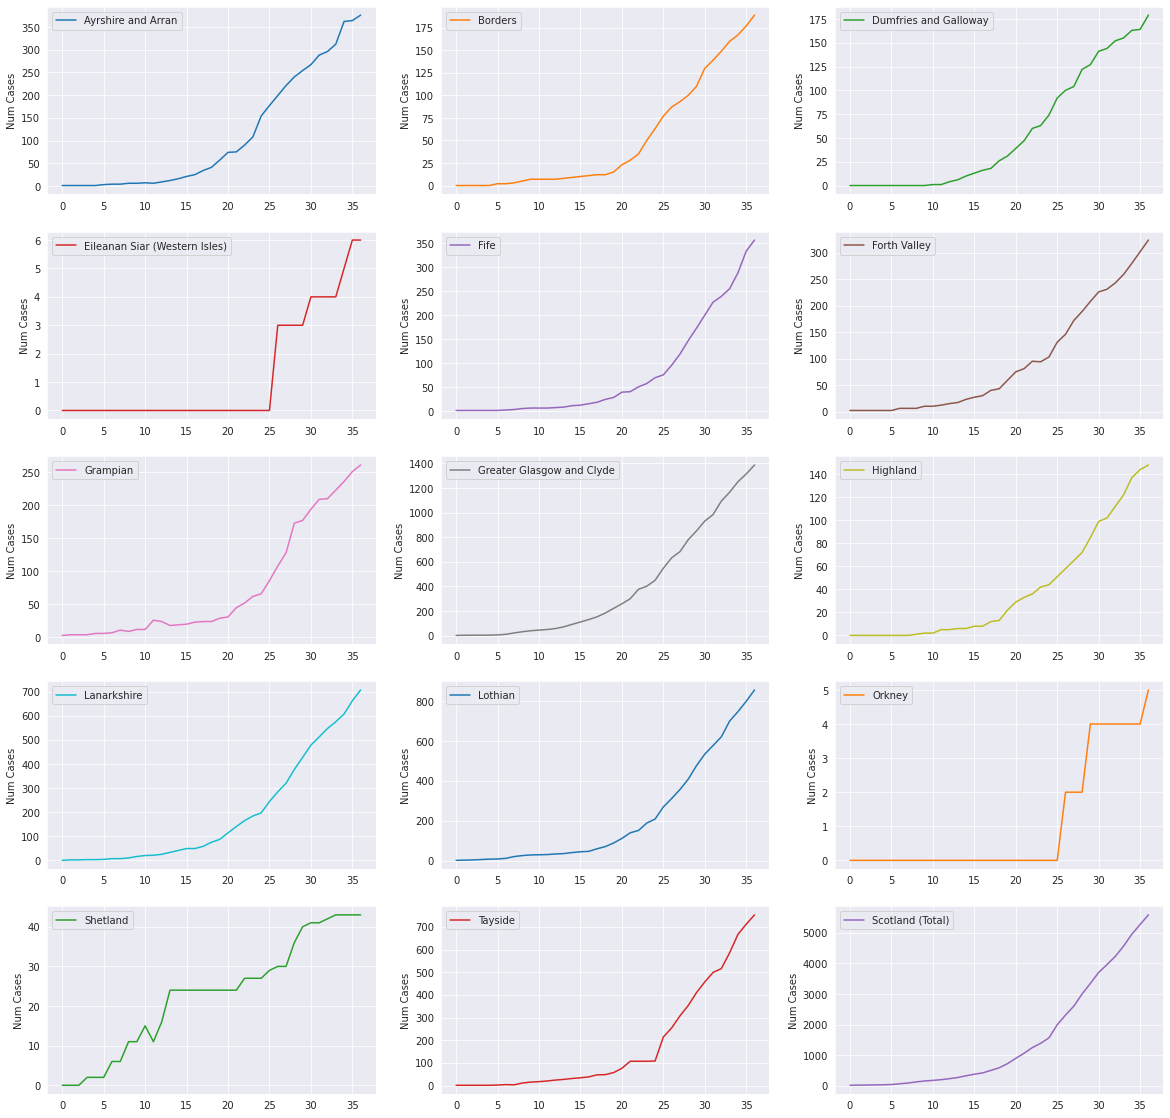

In [101]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

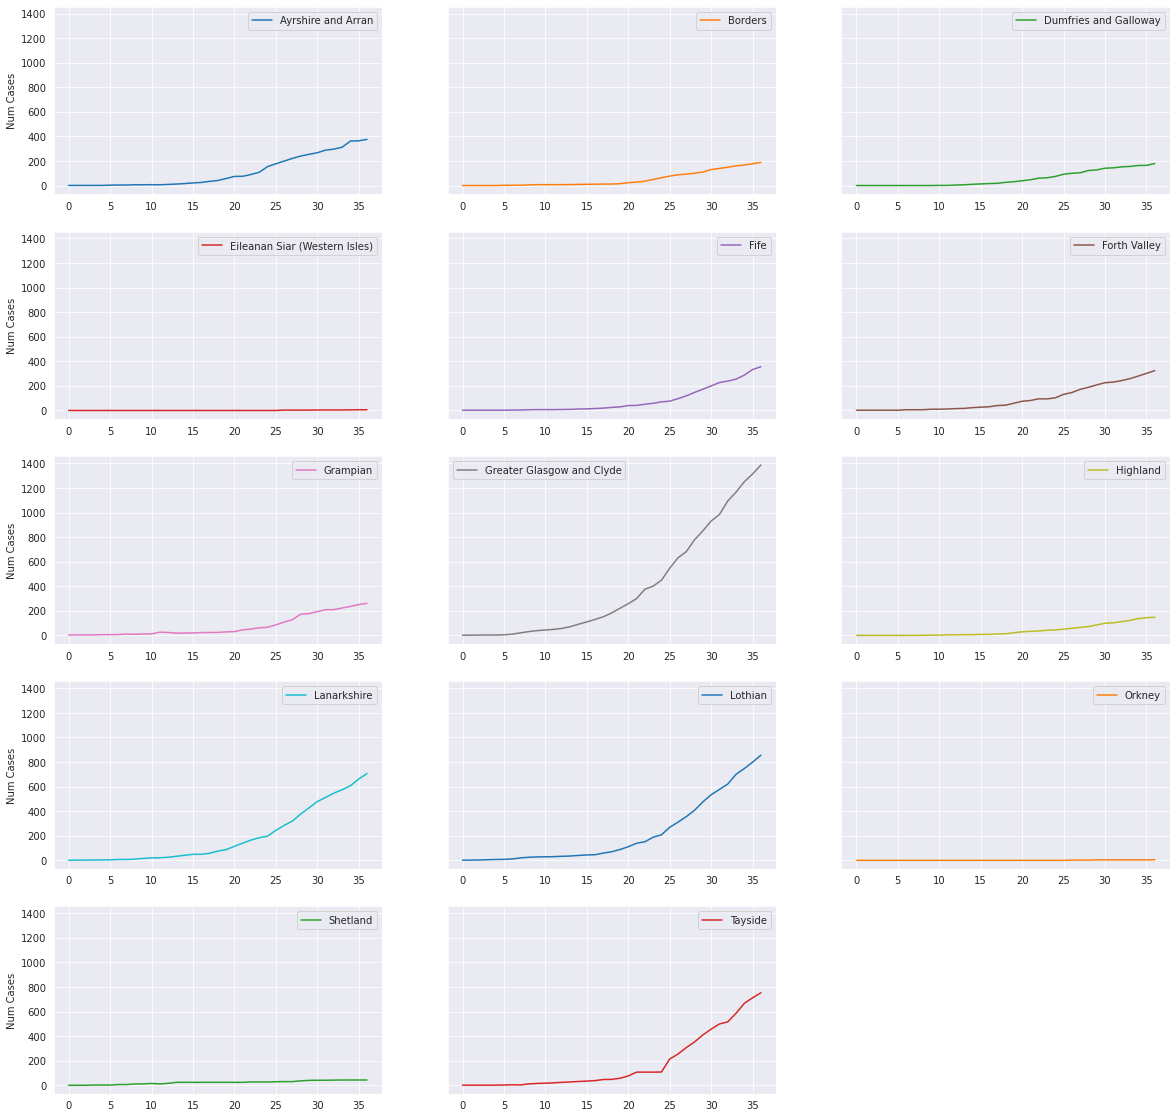

In [102]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [103]:
194 / 178

1.0898876404494382

In [104]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [105]:
df_cases_rel = df_cases / df_pop.values.T

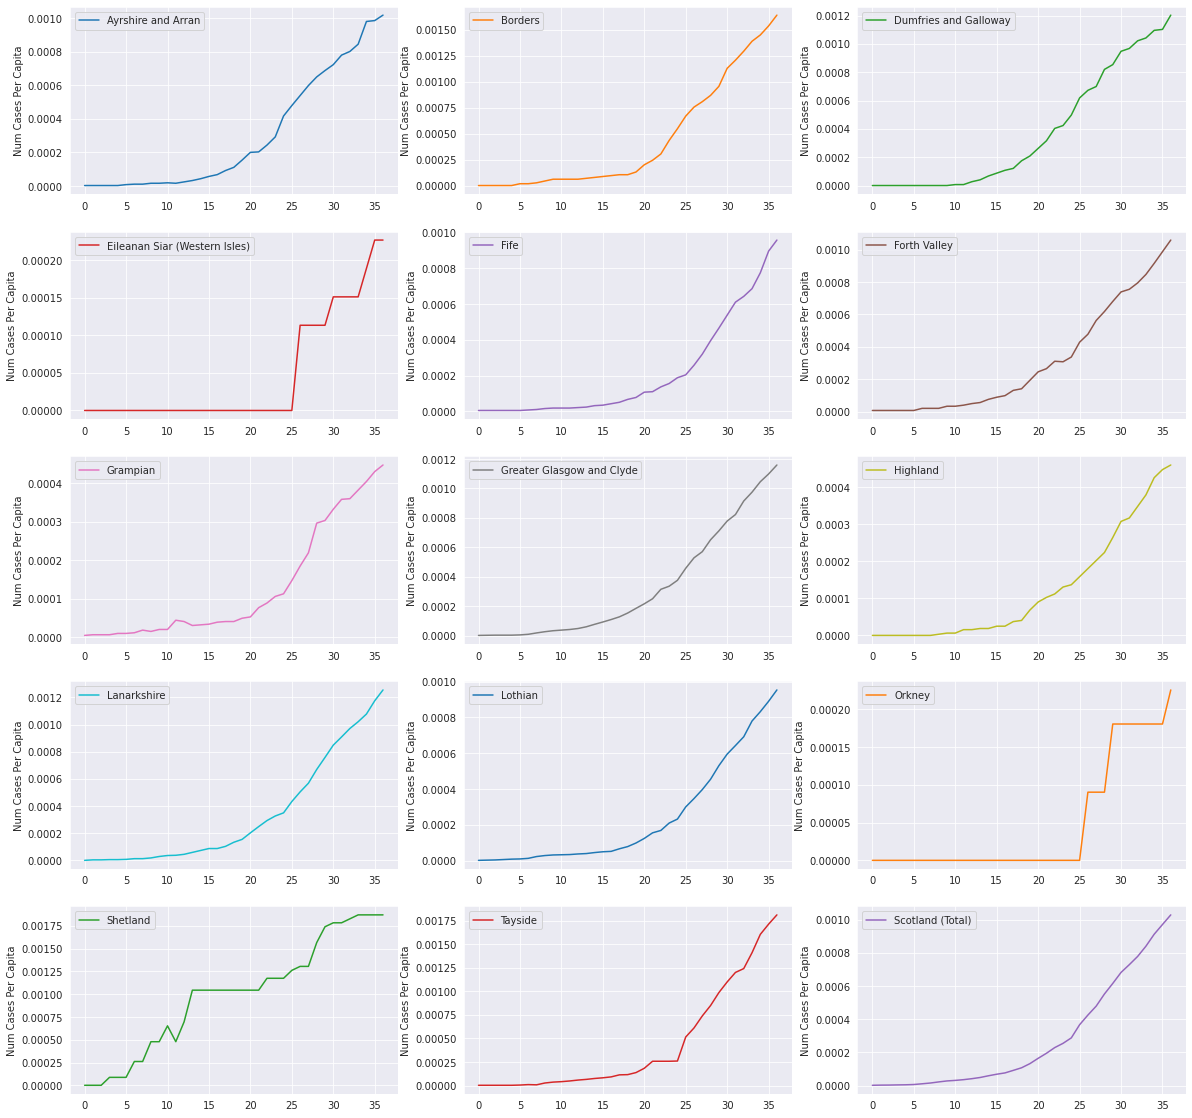

In [106]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

- Same again but sharing the y axis for comparison

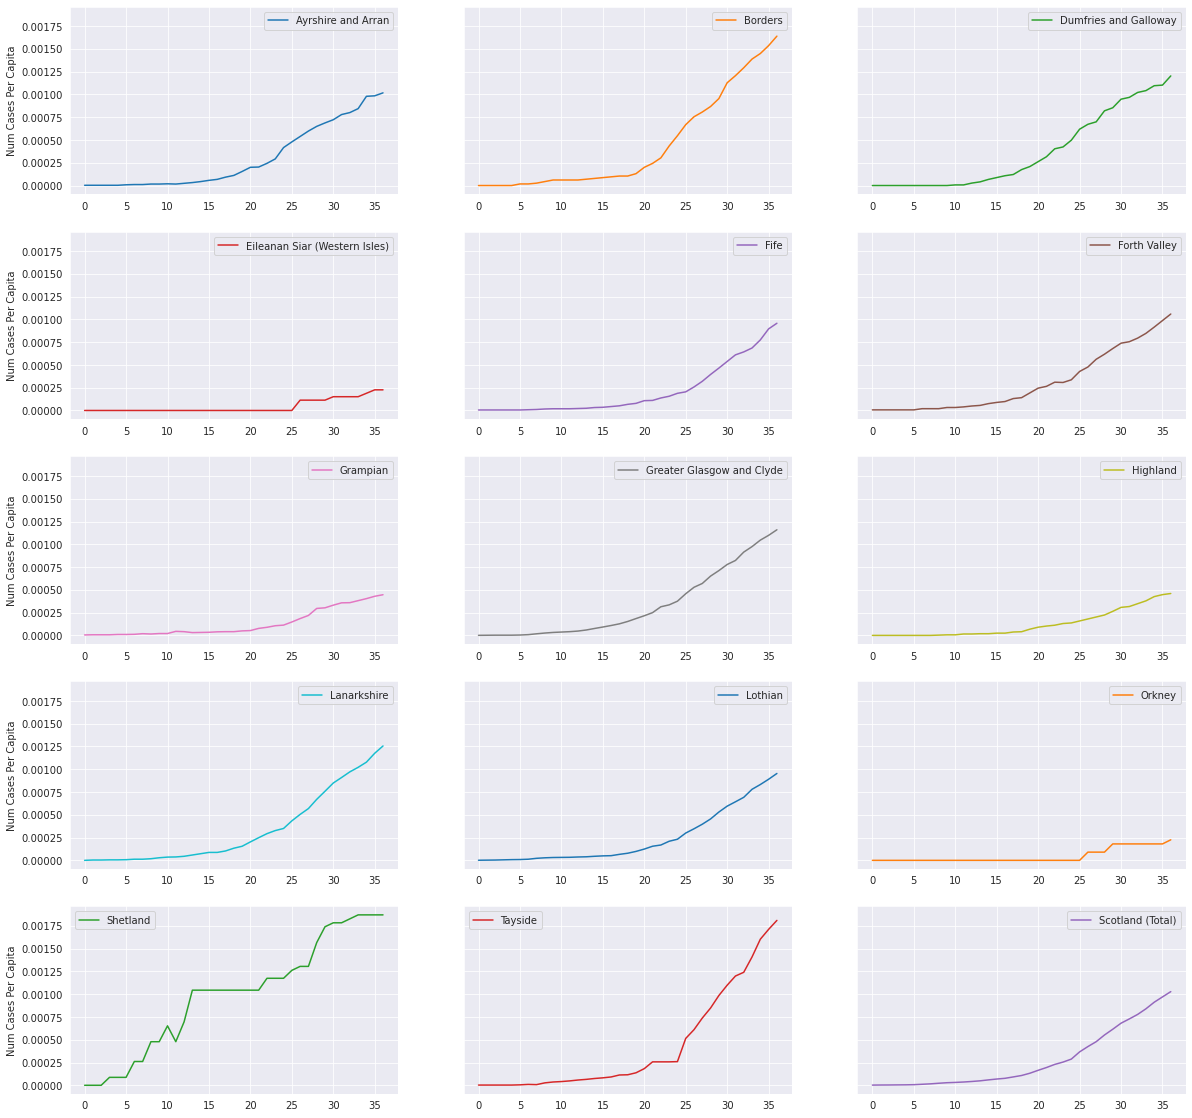

In [107]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

In [108]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

KeyboardInterrupt: 

### Day-on-day Num Cases

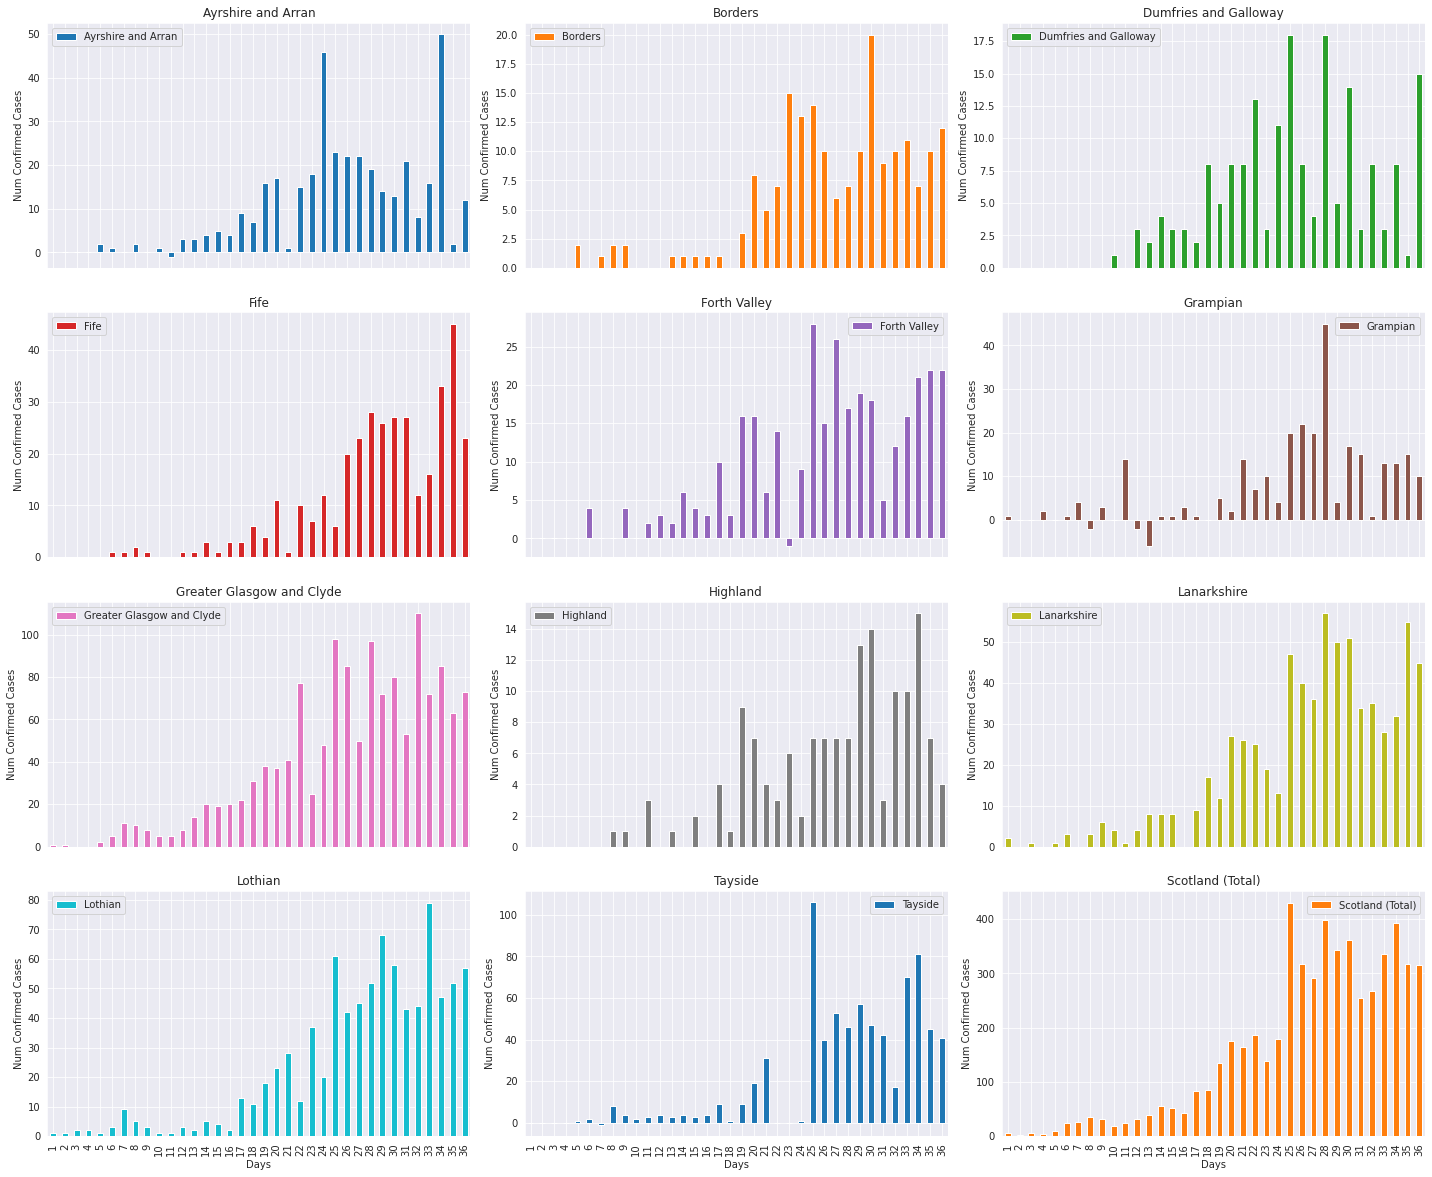

In [130]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

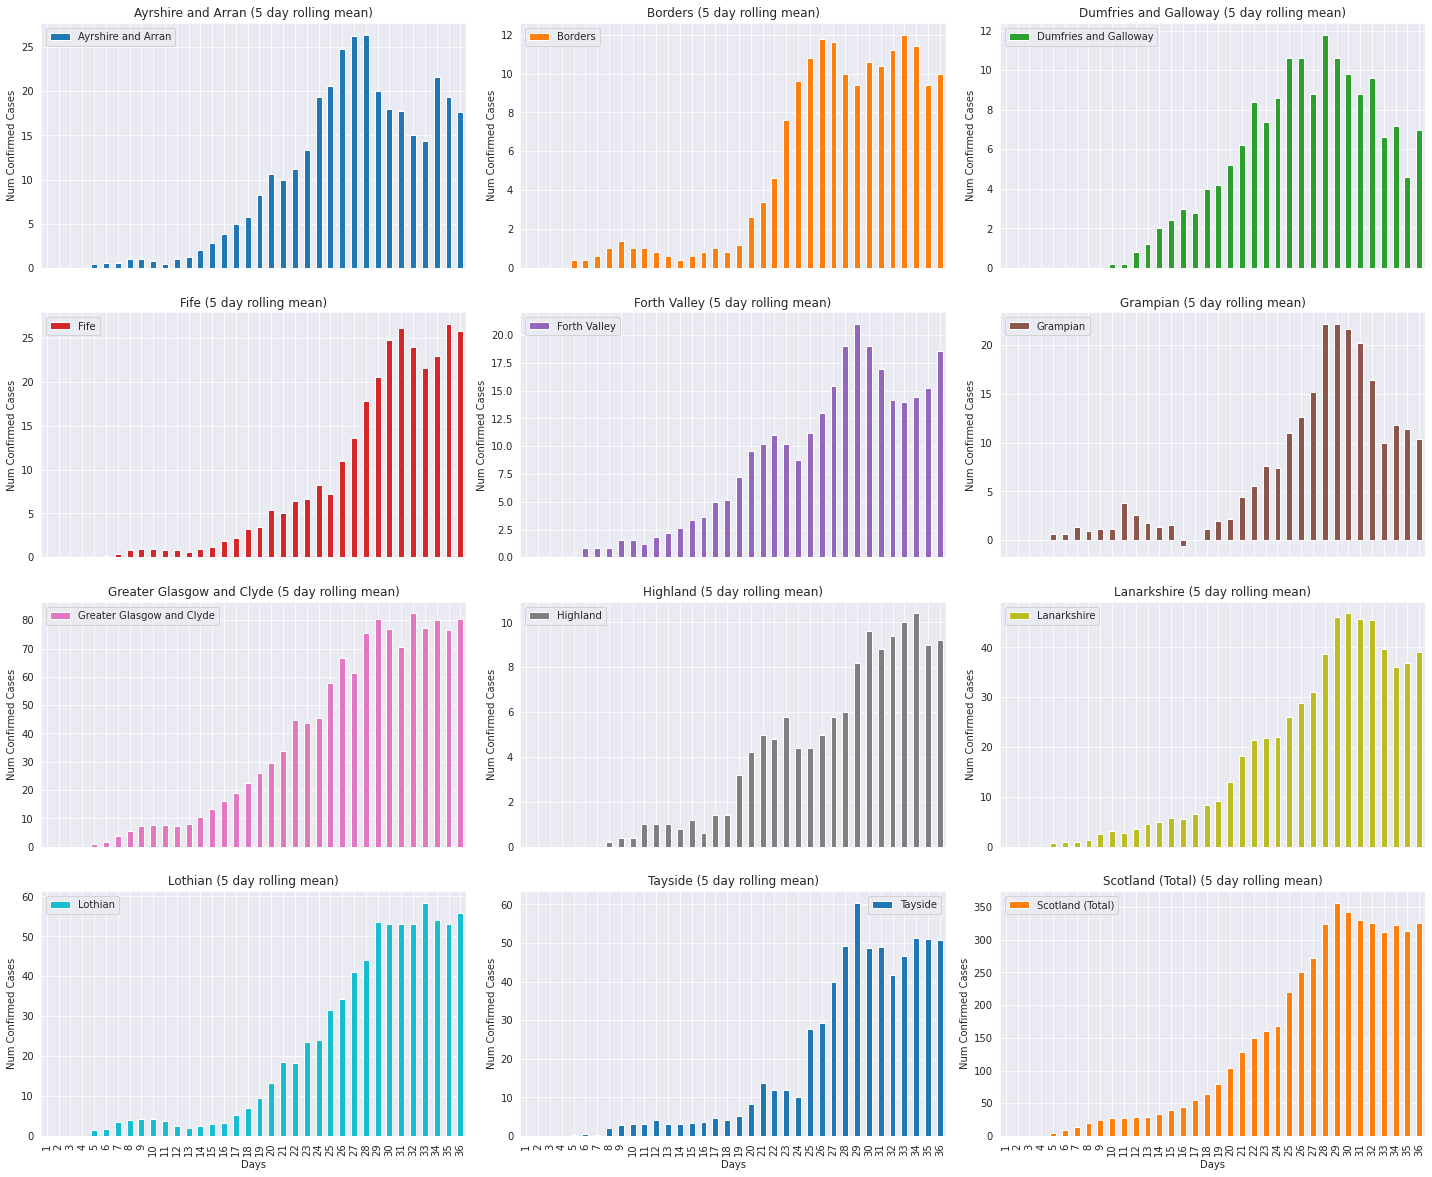

In [131]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(5).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + ' (5 day rolling mean)')
plt.tight_layout()
plt.show()

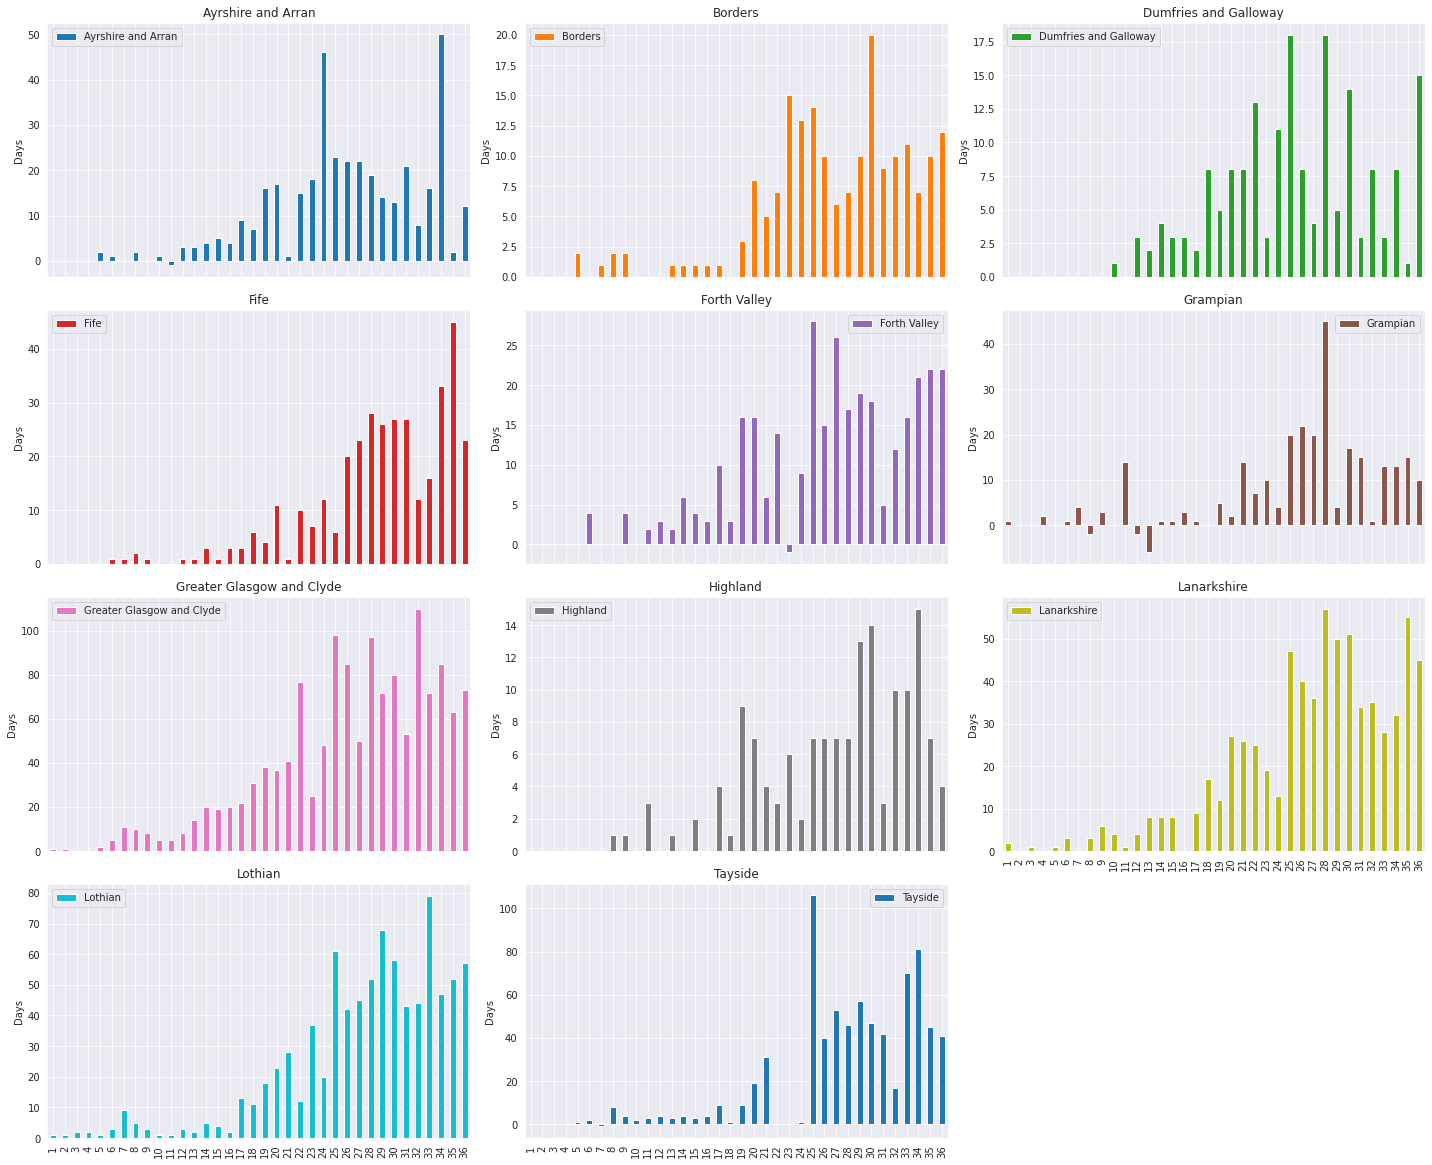

In [112]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [ ]:
df_cases.columns

In [ ]:
df_cases_rel.idxmax(1)

In [ ]:
df_cases.drop(columns='Scotland (Total)').idxmax(1)

### Log Growth Curves for Each Region

In [ ]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

In [ ]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()